**Built on Colab. Best viewed in the Dark theme**

In [173]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from pandas import DataFrame as df
import datetime
from tqdm import tqdm
import pandas as pd
from PIL import Image
from PIL import ImageEnhance
from numpy.random import seed
seed(1)
pd.set_option('display.max_colwidth', -1)

In [40]:
items=glob.glob('/gdrive/My Drive/Capstone project images/color/Grape*/*.JPG',recursive=True)
data=df(columns=['Item'],data=items)
data['Folder']=data['Item'].str.rsplit('/', 1, expand=True)[0]
data['Folder']=data['Folder'].str.rsplit('/', 1, expand=True)[1]
data['Species']=data['Folder'].str.rsplit('___', 1, expand=True)[0]
data['Disease']=data['Folder'].str.rsplit('___', 1, expand=True)[1]
data['Image Path']=data['Item']
data.drop(['Species','Item','Folder'],axis=1,inplace=True)
data.sample(5)

Disease                                                                                                                                              Image Path
4050  Black_rot                           /gdrive/My Drive/Capstone project images/color/Grape___Black_rot/24bb2117-b963-419d-af41-87ebd4cb204f___FAM_B.Rot 3275.JPG                            
1822  Leaf_blight_(Isariopsis_Leaf_Spot)  /gdrive/My Drive/Capstone project images/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/7840bdb2-d326-4fe4-8afb-968636c209b7___FAM_L.Blight 4568.JPG
4013  Black_rot                           /gdrive/My Drive/Capstone project images/color/Grape___Black_rot/1cf4f8fe-a820-4f3d-b69b-795e57e03a65___FAM_B.Rot 3438.JPG                            
3211  Black_rot                           /gdrive/My Drive/Capstone project images/color/Grape___Black_rot/701c5faf-f1b1-434f-abc3-785b91264be4___FAM_B.Rot 3308.JPG                            
2232  Leaf_blight_(Isariopsis_Leaf_Spot)  /gdrive/My Drive/Capstone project images/color/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/df3ee378-7fc4-4fec-99f9-5567dc7ff433___FAM_L.Blight 1605.JPG

In [60]:
orig=[]
for img in tqdm(data['Image Path']):
  image = Image.open(img)
  orig.append(np.asarray(image))

100%|██████████| 4062/4062 [00:15<00:00, 270.20it/s]


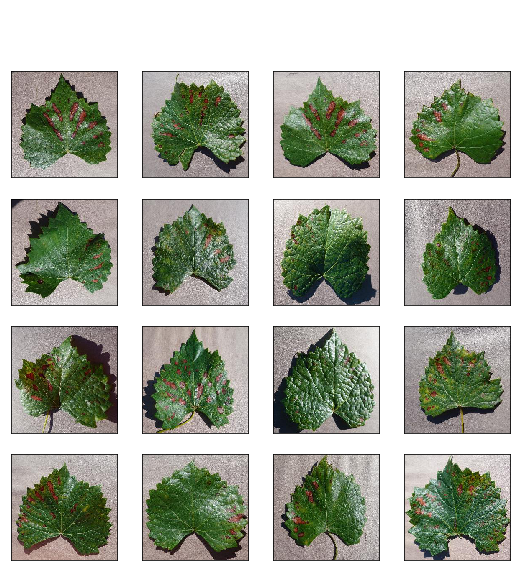

In [72]:
plt.figure(figsize=(9,9))
i=0
for img in orig[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Original", fontsize=20,color='w')
plt.show()

In [84]:
contrast=[]
contrastfactors=np.linspace(0.5,1.5,5)
for img in tqdm(orig):
  enhancer_object = ImageEnhance.Contrast(Image.fromarray(img,'RGB'))
  out = enhancer_object.enhance(np.random.choice(contrastfactors))
  contrast.append(np.asarray(out))

100%|██████████| 4062/4062 [00:06<00:00, 620.67it/s]


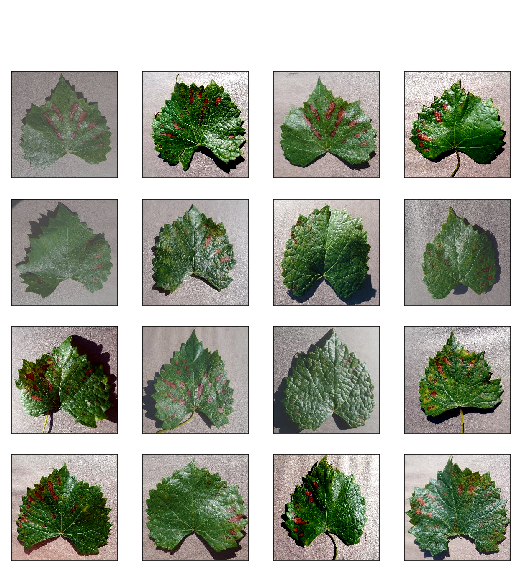

In [86]:
plt.figure(figsize=(9,9))
i=0
for img in contrast[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Contrast tweaked by a factor of {} to {}".format(min(contrastfactors),max(contrastfactors)), fontsize=20,color='w')
plt.show()

In [89]:
brightness=[]
brightnessfactors=np.linspace(0.5,1.5,5)
for img in tqdm(contrast):
  enhancer_object = ImageEnhance.Brightness(Image.fromarray(img,'RGB'))
  out = enhancer_object.enhance(np.random.choice(brightnessfactors))
  brightness.append(np.asarray(out))

100%|██████████| 4062/4062 [00:05<00:00, 782.04it/s]


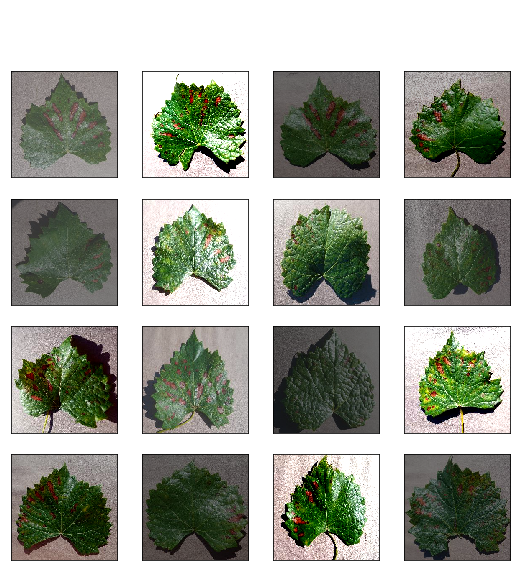

In [90]:
plt.figure(figsize=(9,9))
i=0
for img in brightness[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Brightness tweaked by a factor of {} to {}".format(min(brightnessfactors),max(brightnessfactors)), fontsize=20,color='w')
plt.show()

In [94]:
sharpness=[]
sharpnessfactors=np.linspace(0.5,1.5,5)
for img in tqdm(brightness):
  enhancer_object = ImageEnhance.Sharpness(Image.fromarray(img,'RGB'))
  out = enhancer_object.enhance(np.random.choice(sharpnessfactors))
  sharpness.append(np.asarray(out))

100%|██████████| 4062/4062 [00:11<00:00, 354.90it/s]


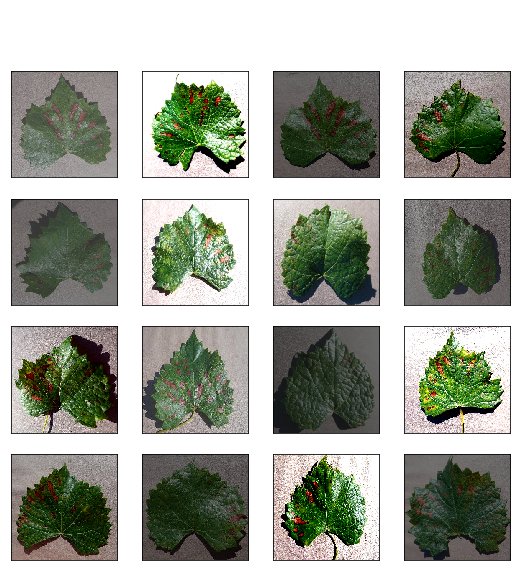

In [95]:
plt.figure(figsize=(9,9))
i=0
for img in sharpness[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Sharpness tweaked by a factor of {} to {}".format(min(sharpnessfactors),max(sharpnessfactors)), fontsize=20,color='w')
plt.show()

In [100]:
color=[]
colorfactors=np.linspace(0.5,1.5,5)
for img in tqdm(sharpness):
  enhancer_object = ImageEnhance.Color(Image.fromarray(img,'RGB'))
  out = enhancer_object.enhance(np.random.choice(colorfactors))
  color.append(np.asarray(out))

100%|██████████| 4062/4062 [00:05<00:00, 695.81it/s]


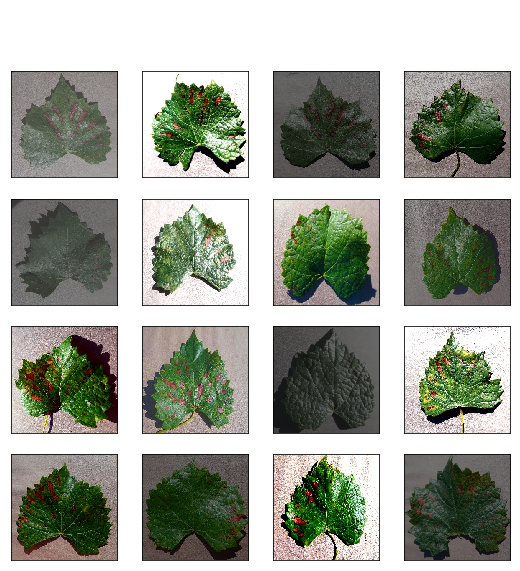

In [101]:
plt.figure(figsize=(9,9))
i=0
for img in color[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Color corrected by a factor of {} to {}".format(min(colorfactors),max(colorfactors)), fontsize=20,color='w')
plt.show()

In [119]:
flip=[]
for img in tqdm(color):
  if np.random.choice([0,1])==0:
    flip.append(cv2.flip(img,np.random.choice([0,1,-1])))
  else:
    flip.append(img)

100%|██████████| 4062/4062 [00:00<00:00, 6052.28it/s]


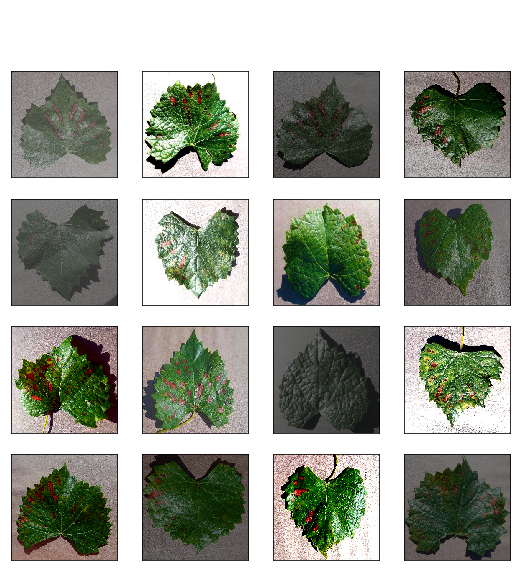

In [120]:
plt.figure(figsize=(9,9))
i=0
for img in flip[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Flipped vertically and/or horizontally", fontsize=20,color='w')
plt.show()

In [126]:
rotate=[]
for img in tqdm(flip):
    rotate.append(Image.fromarray(img,'RGB').rotate(np.random.choice([0,90,180,270])))

100%|██████████| 4062/4062 [00:01<00:00, 2284.23it/s]


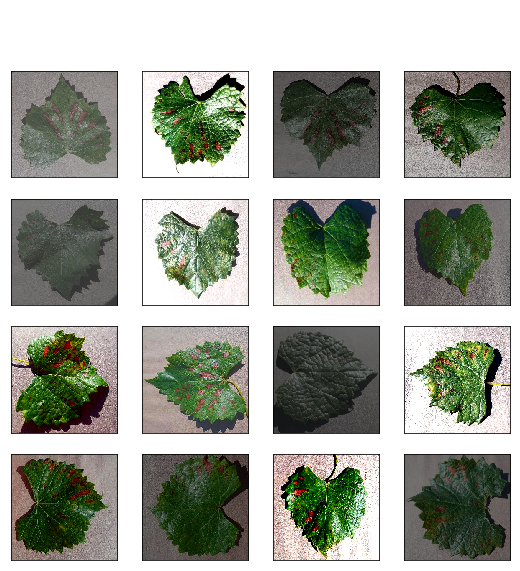

In [127]:
plt.figure(figsize=(9,9))
i=0
for img in rotate[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  i+=1
plt.suptitle("Rotated by 0, 90, 180, or 270 degrees", fontsize=20,color='w')
plt.show()

In [0]:
gray=[]
for img in rotate:
  gray.append(cv2.cvtColor(np.asarray(img), cv2.COLOR_RGB2GRAY))

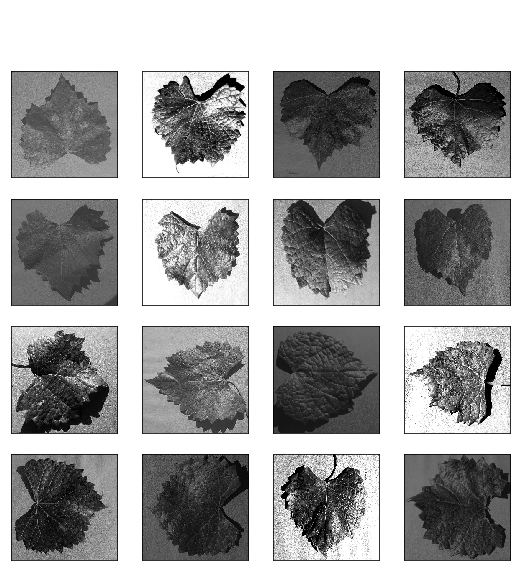

In [133]:
plt.figure(figsize=(9,9))
i=0
for img in gray[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
  i+=1
plt.suptitle("Grayscale", fontsize=20,color='w')
plt.show()

In [0]:
thresh=[]
for img in gray:
  th, threshed = cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
  thresh.append(threshed)

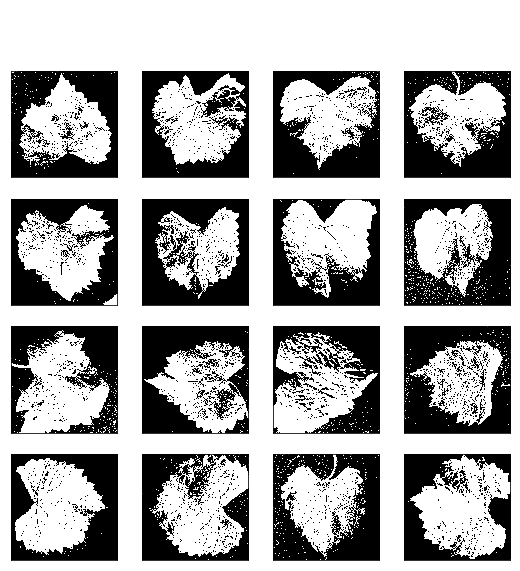

In [137]:
plt.figure(figsize=(9,9))
i=0
for threshimg in thresh[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(threshimg,cmap='gray')
  i+=1
plt.suptitle("Threshold", fontsize=20,color='w')
plt.show()

In [167]:
np.zeros(flip[0].shape[:2],np.uint8).shape

(256, 256)

In [169]:
masked=[]
segmented=[]
i=0
for threshimg in tqdm(thresh):
  cnts = cv2.findContours(threshimg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[-2]
  cnts = sorted(cnts, key=cv2.contourArea,reverse=True)
  cnt=cnts[0]
  mask = np.zeros((256,256),np.uint8)
  masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
  dst = cv2.bitwise_and(np.asarray(rotate[i]), np.asarray(rotate[i]), mask=mask)
  segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
  i+=1

100%|██████████| 4062/4062 [00:13<00:00, 301.78it/s]


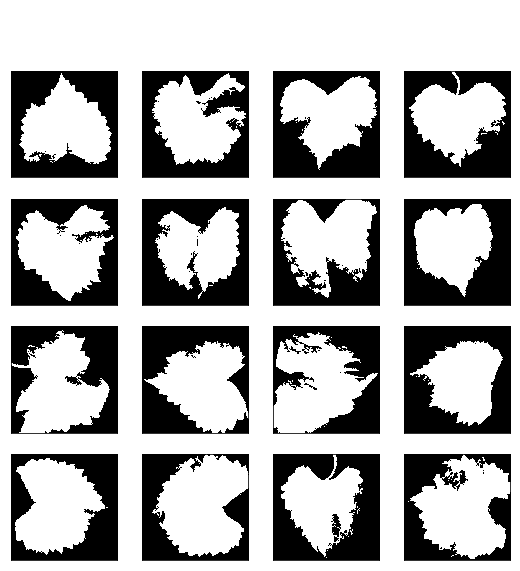

In [170]:
plt.figure(figsize=(9,9))
i=0
for maskimg in masked[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(maskimg,cmap='gray')
  i+=1
plt.suptitle("Mask", fontsize=20,color='w')
plt.show()

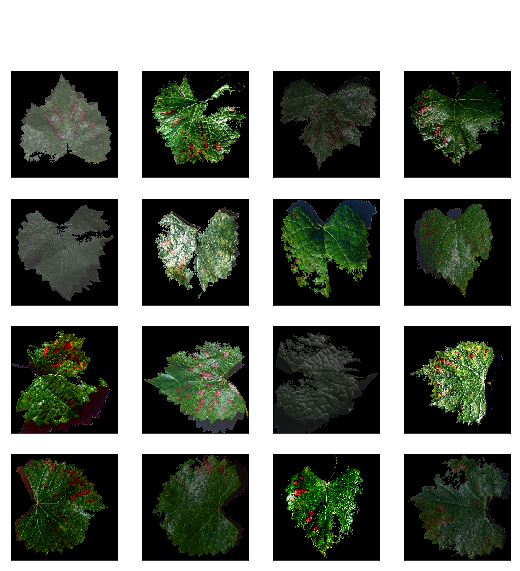

In [171]:
plt.figure(figsize=(9,9))
i=0
for segimg in segmented[0:16]:
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
  i+=1
plt.suptitle("Segmented", fontsize=20,color='w')
plt.show()

In [174]:
i=0
for image in tqdm(segmented):
  cv2.imwrite(data['Image Path'][i].rsplit('/',3)[0]+'/augmented/'+data['Image Path'][i].rsplit('/',2)[1]+'/'+data['Image Path'][i].rsplit('/',2)[2], image)#cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  i+=1

100%|██████████| 4062/4062 [00:22<00:00, 183.75it/s]
